# 逻辑回归
- 解决的是一个二分类问题
- 逻辑回归的输入是线性回归的输出

## 逻辑回归的原理
- 输入：
    - 线性回归的输出
    
        $h(w)=w_1x_1+w_2x_2+w_3x_3...+\text{b}$
        
- 激活函数
    - sigmoid函数
        
        $g(w^T,x)=\frac{1}{1+e^{-h(w)}}=\frac{1}{1+e^{-w^Tx}}$
    - 把整体的值映射到[0,1]
    - 再设置一个阈值，进行分类判断
    
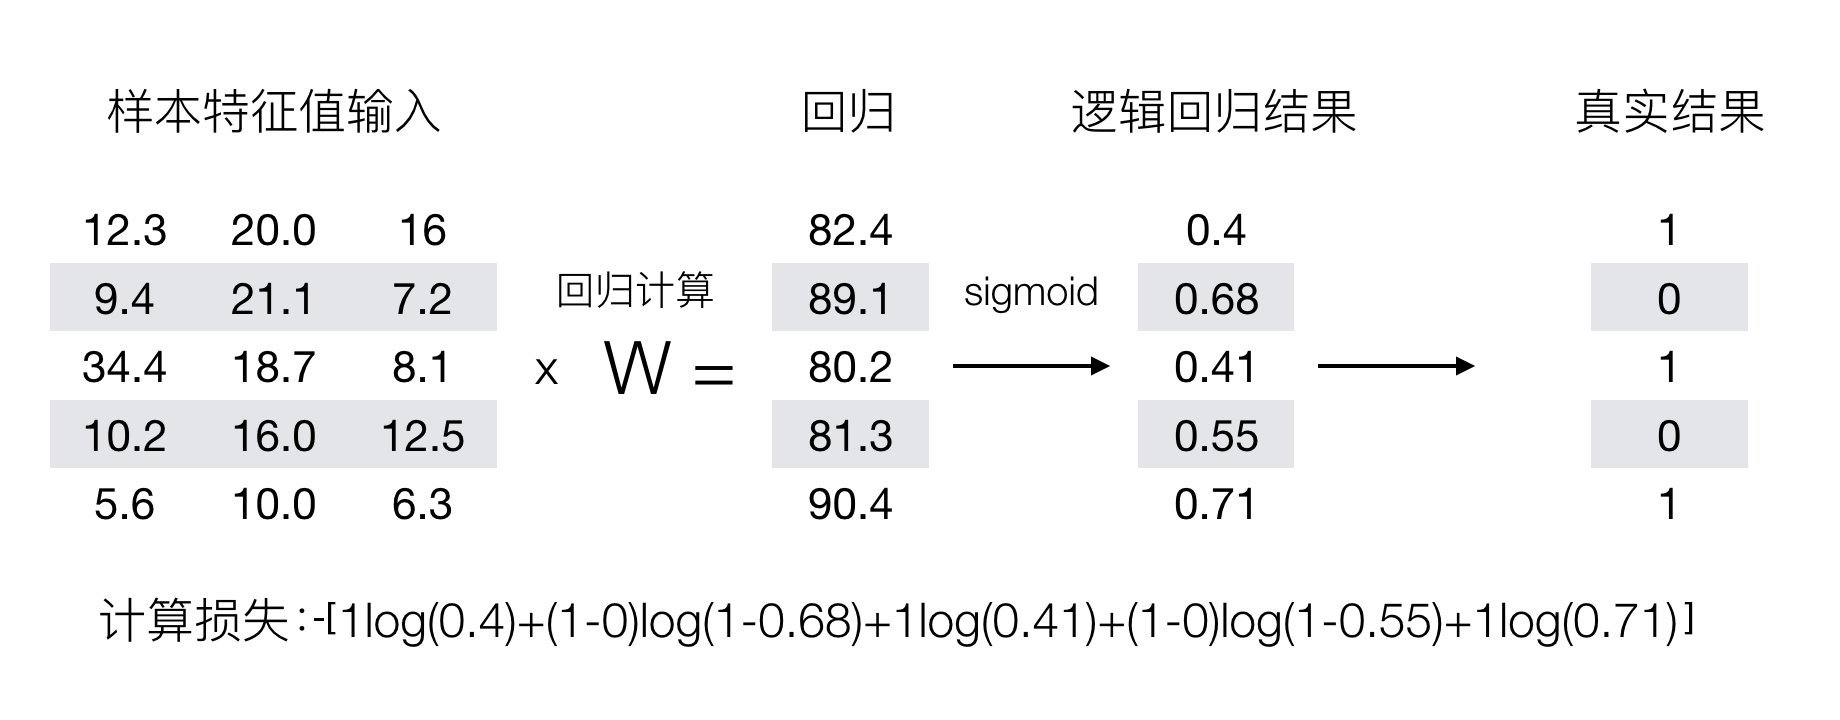

## 逻辑回归的损失和优化
### 损失
逻辑回归的损失，称之为对数似然损失，公式如下：

分开类别：
    
$$cost(h_\theta(x),y)=\left\{\begin{array}{ll}-log(h_\theta(x))&\text{if y=1}\\-log(1-h_\theta(x))&\text{if y=0}\end{array}\right.$$
        
$h_{\theta}(x)$为预测值对应的概率值。
        
- 当y=1时，我们希望值$h_{\theta}(x)$越大越好
- 当y=0时，我们希望值$h_{\theta}(x)$越小越好
- 综合完整损失函数
$$cost(h_\theta(x),y)=\sum_{i=1}^m-y_i log(h_\theta(x))-(1-y_i)log(1-h_\theta(x))$$

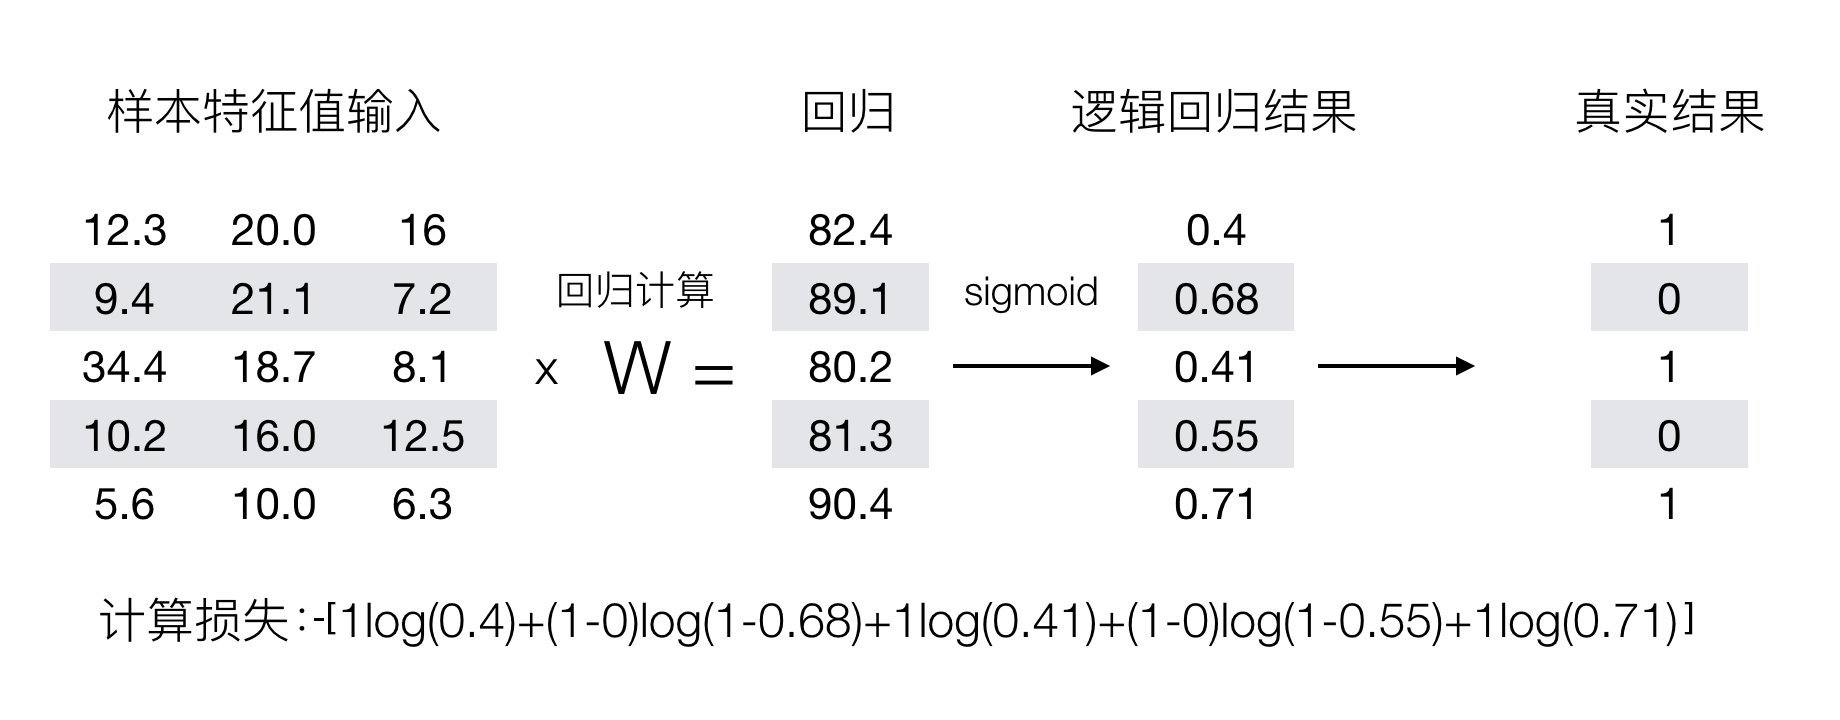

### 优化
提升原本属于1类别的概率，降低原本是0类别的概率。

## API
### sklearn.linear_model.LogisticRegression()

```python
sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```

`sklearn.linear_model.LogisticRegression()`函数<font color=blue>是逻辑回归的一个实现类。</font>

- 参数说明：

    - `penalty` : 可选参数，表示用于指定正则化类型的字符串。默认是`l2`正则化。
    
    - `dual` : 可选参数，表示是否使用对偶形式求解。默认是`False`，即原始问题的 primal form 求解。
    
    - `tol` : 可选参数，表示迭代终止的容忍度。默认是`0.0001`。
    
    - `C` : 可选参数，表示正则化强度的倒数。默认是`1.0`。
    
    - `fit_intercept` : 可选参数，表示是否应该在模型中计算截距。默认是`True`。
    
    - `intercept_scaling` : 可选参数，表示当`fit_intercept`设置为`True`时，是否应该缩放x。默认是`1`。
    
    - `class_weight` : 可选参数，表示对于多类问题，指定每个类的权重。默认是`None`，代表所有类的权重都应该是一样的。
    
    - `random_state` : 可选参数，表示用于混洗数据的随机数生成器的种子。
    
    - `solver` : 可选参数，表示用于优化问题的算法。默认是`lbfgs`。
    
    - `max_iter` : 可选参数，表示求解器的最大迭代次数。默认是`100`。
    
    - `multi_class` : 可选参数，表示用于多类问题的策略。默认是`auto`。
    
    - `verbose` : 可选参数，表示是否应该在迭代期间打印输出。默认是`0`。
    
    - `warm_start` : 可选参数，表示是否重用上一个调用的解决方案作为初始拟合。默认是`False`。
    
    - `n_jobs` : 可选参数，表示用于拟合和预测的作业数量。默认是`None`。
    
    - `l1_ratio` : 可选参数，表示`Elastic-Net`正则化参数。默认是`None`，代表没有弹性网正则化。

- 返回值：

    返回逻辑回归模型对象。
    
- 参考链接：

    官方文档：[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

    默认将类别数量少的当做正例

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.array([[0, 0], [1, 1]])
y = np.array([0, 1])
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.predict(X))
print(clf.score(X, y))
print(clf.coef_)
print(clf.intercept_)

[0 1]
1.0
[[0.40105276 0.40105276]]
[-0.40103584]


## 案例1：癌症分类预测-良／恶性乳腺癌肿瘤预测

- 如果数据中有缺失值，一定要对其进行处理
- 准确率并不是衡量分类正确的唯一标准

### 1.获取数据

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [9]:
names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                   'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                   'Normal Nucleoli', 'Mitoses', 'Class']

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                  names=names)
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 2.基本数据处理
#### 2.1 缺失值处理

In [10]:
data = data.replace(to_replace="?", value=np.NaN)
data = data.dropna()

#### 2.2 确定特征值,目标值

In [13]:
x = data.iloc[:, 1:10]
x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [14]:
y = data["Class"]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

#### 2.3 分割数据

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

### 3.特征工程(标准化)

In [17]:
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

### 4.机器学习(逻辑回归)

In [18]:
estimator = LogisticRegression()
estimator.fit(x_train, y_train)

LogisticRegression()

### 5.模型评估

In [19]:
y_predict = estimator.predict(x_test)
y_predict
estimator.score(x_test, y_test)

0.9854014598540146

# 分类评估方法
## 精确率与召回率
### 混淆矩阵
- 真正例（TP）
- 伪反例（FN）
- 伪正例（FP）
- 真反例（TN）
        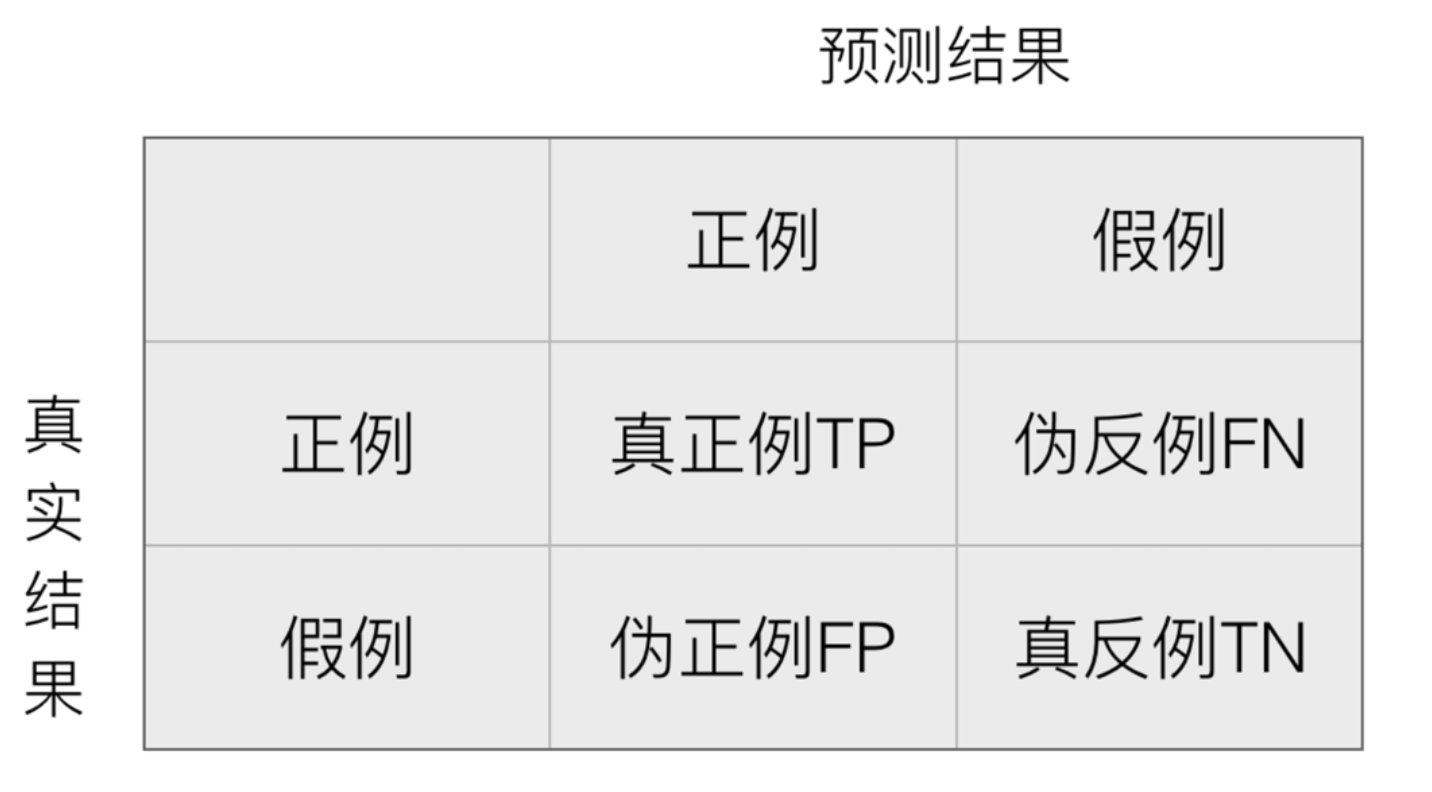

## 精确率(Precision)与召回率(Recall)
### 准确率
- 对不对
- （TP+TN）/(TP+TN+FN+FP)

### 精确率
- 查的准不准
- TP/(TP+FP)
        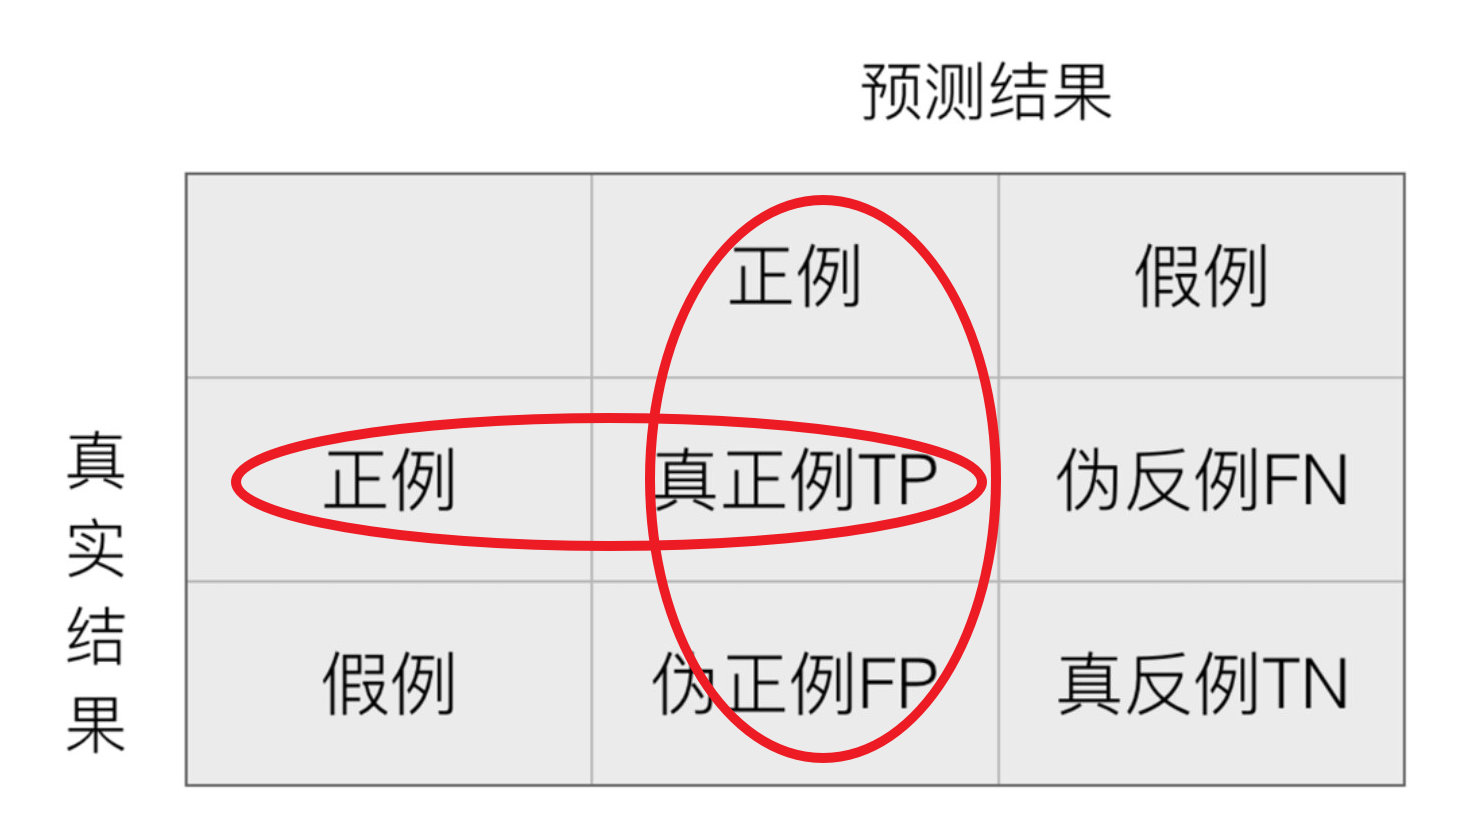
### 召回率
- 查的全不全
- TP/(TP+FN)
        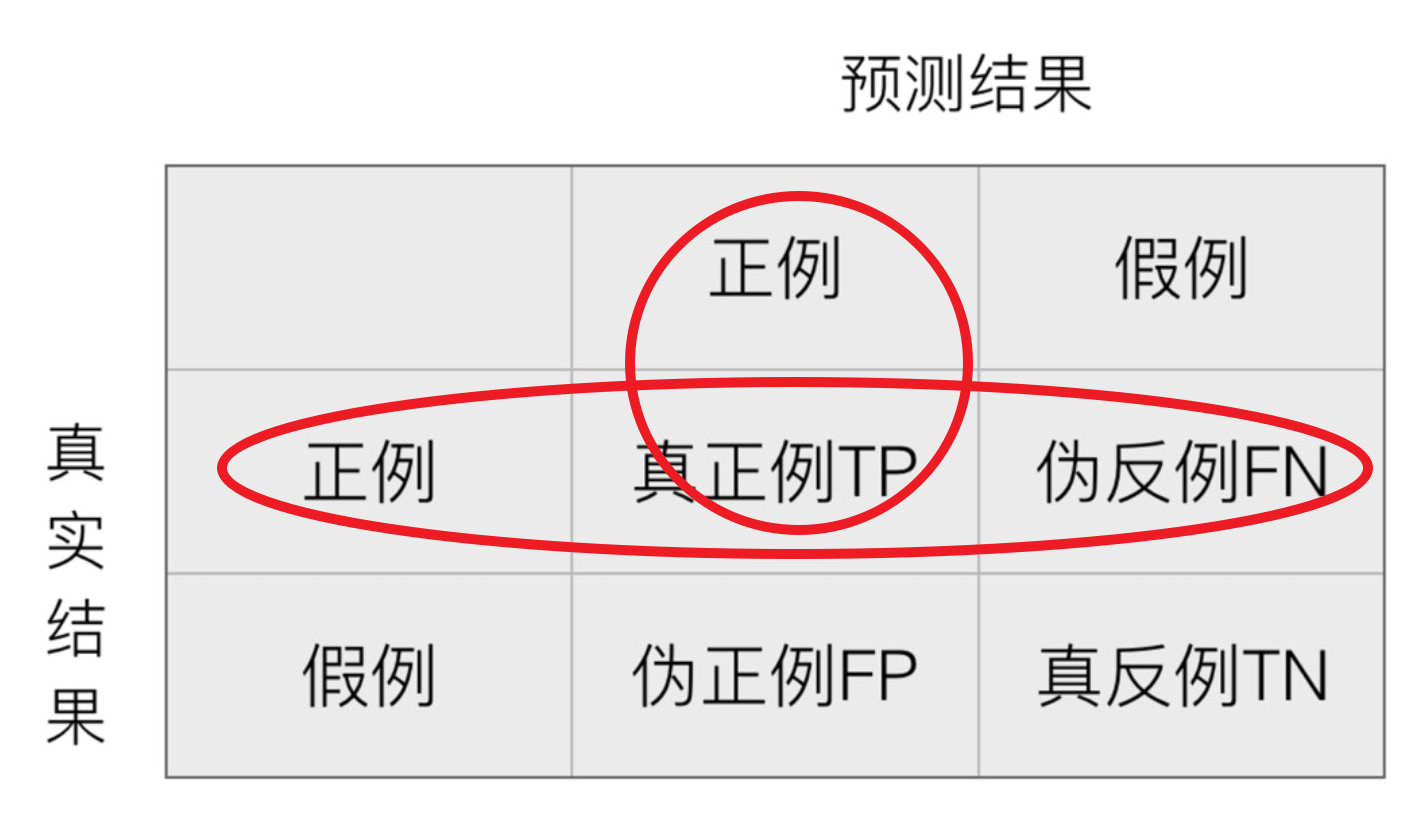
### F1-score
$$F1=\frac{2TP}{2TP+FN+FP}=\frac{2\cdot Precision\cdot Recall}{Precision+Recall}$$
- 反映模型的稳健性

## API
### sklearn.metrics.classification_report()

```python
sklearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
```

`sklearn.metrics.classification_report()`函数<font color=blue>计算并打印每个类别的精确度、召回率、F1值和支持度，并计算宏平均和微平均。</font>

- 参数说明：

    - `y_true` : 真实标签。
    - `y_pred` : 预测标签。
    - `labels` : 默认为None，表示输出结果中包含哪些类别的统计结果。
    - `target_names` : 默认为None，表示输出结果中包含哪些类别的名称。
    - `sample_weight` : 样本权重。
    - `digits` : 默认为2，表示输出结果中保留的小数位数。
    - `output_dict` : 默认为False，表示输出格式是否为字典形式。

- 返回值：

    返回每个类别的精确度、召回率、F1值和支持度，并计算宏平均和微平均。
    
- 参考链接：

    官方文档：[sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [21]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 1]
y_pred = [0, 2, 1, 2, 0]
target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         2
     class 2       0.50      0.50      0.50         2

    accuracy                           0.40         5
   macro avg       0.33      0.50      0.39         5
weighted avg       0.30      0.40      0.33         5



该示例中，真实标签为`[0, 1, 2, 2, 1]`，预测标签为`[0, 2, 1, 2, 0]`，分类总共有3个类别，分别为`class 0`、`class 1`和`class 2`。函数输出了每个类别的精确度、召回率、F1值和支持度，以及宏平均和微平均。

# roc曲线和auc指标
## TPR与FPR
- TPR = TP / (TP + FN)
    - 所有真实类别为1的样本中，预测类别为1的比例
- FPR = FP / (FP + TN)
    - 所有真实类别为0的样本中，预测类别为1的比例
## ROC曲线
ROC曲线的横轴就是FPRate，纵轴就是TPRate，当二者相等时，表示的意义则是：对于不论真实类别是1还是0的样本，分类器预测为1的概率是相等的，此时AUC为0.5
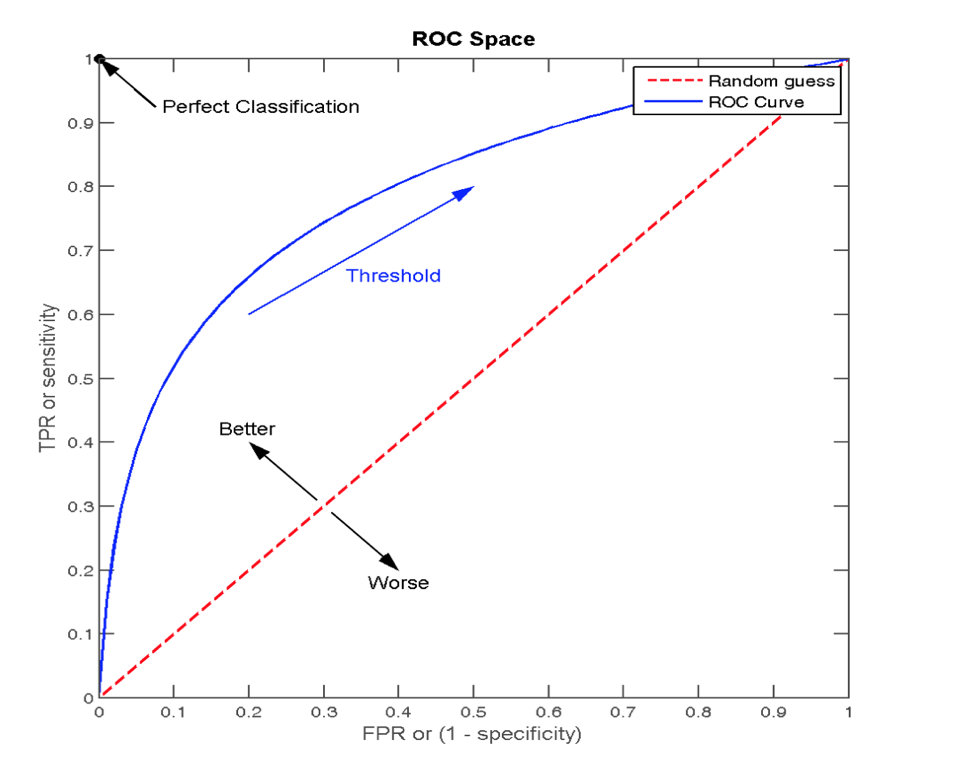

## AUC指标
- AUC的概率意义是随机取一对正负样本，正样本得分大于负样本得分的概率
- AUC的范围在[0, 1]之间，并且越接近1越好，越接近0.5属于乱猜
- **AUC=1，完美分类器，采用这个预测模型时，不管设定什么阈值都能得出完美预测。绝大多数预测的场合，不存在完美分类器**。
- **0.5<AUC<1，优于随机猜测。这个分类器（模型）妥善设定阈值的话，能有预测价值**。

## API
### sklearn.metrics.roc_auc_score()

```python
sklearn.metrics.roc_auc_score(y_true, y_score, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
```

`sklearn.metrics.roc_auc_score()`函数<font color=blue>计算多分类或二分类问题中的ROC AUC。</font>

- 参数说明：

    - `y_true` : 真实标签。
    - `y_score` : 预测标签的概率或决策函数值。
    - `average` : 默认为'macro'，表示多类别问题的平均策略。如果是'binary'，则只计算二分类问题的AUC值；如果是'macro'，则计算每个类别的AUC值的平均值；如果是'micro'，则将所有的真实标签和预测标签汇总后，计算AUC值。
    - `sample_weight` : 样本权重。
    - `max_fpr` : 默认为None，表示在计算AUC时，最大的假正例率。
    - `multi_class` : 默认为'raise'，表示多分类问题的处理策略。如果是'raise'，则多分类问题会引发ValueError异常；如果是'ovr'，则采用“一对多”策略进行计算；如果是'ovo'，则采用“一对一”策略进行计算。
    - `labels` : 默认为None，表示标签的索引序列。如果是None，则按照自然顺序递增排列。

- 返回值：

    返回二分类或多分类问题中的ROC AUC。
    
- 参考链接：

    官方文档：[sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

    AUC只能用来评价二分类
    
    AUC非常适合评价样本不平衡中的分类器性能

In [26]:
from sklearn.metrics import roc_auc_score

y_true = [0, 1, 0, 1]
y_score = [0.1, 0.9, 0.2, 0.8]

print(roc_auc_score(y_true, y_score))

1.0


该示例中，真实标签为`[0, 1, 0, 1]`，预测标签的概率为`[0.1, 0.9, 0.2, 0.8]`，函数输出了二分类问题中的ROC AUC值。

# ROC曲线的绘制

假设有6次展示记录，有两次被点击了，得到一个展示序列（$1:1,2:0,3:1,4:0,5:0,6:0$），前面的表示序号，后面的表示点击（1）或没有点击（0）。

然后在这6次展示的时候都通过model算出了点击的概率序列。

下面看三种情况。

## 如果概率的序列是$(1:0.9,2:0.7,3:0.8,4:0.6,5:0.5,6:0.4)$

与原来的序列一起，得到序列（从概率从高到低排）

| 1        | 1        | 0        | 0        | 0        | 0        |
| -------- | -------- | -------- | -------- | -------- | -------- |
| 0.9      | 0.8      | 0.7      | 0.6      | 0.5      | 0.4      |

绘制的步骤是：

1. 把概率序列从高到低排序，得到顺序$(1:0.9,3:0.8,2:0.7,4:0.6,5:0.5,6:0.4)$；
2. 从概率最大开始取一个点作为正类，取到点1，计算得到TPR=0.5，FPR=0.0；
3. 从概率最大开始，再取一个点作为正类，取到点3，计算得到TPR=1.0，FPR=0.0；
4. 再从最大开始取一个点作为正类，取到点2，计算得到TPR=1.0，FPR=0.25;
5. 以此类推，得到6对TPR和FPR。

然后把这6对数据组成6个点(0,0.5),(0,1.0),(0.25,1),(0.5,1),(0.75,1),(1.0,1.0)。

这6个点在二维坐标系中能绘出来。

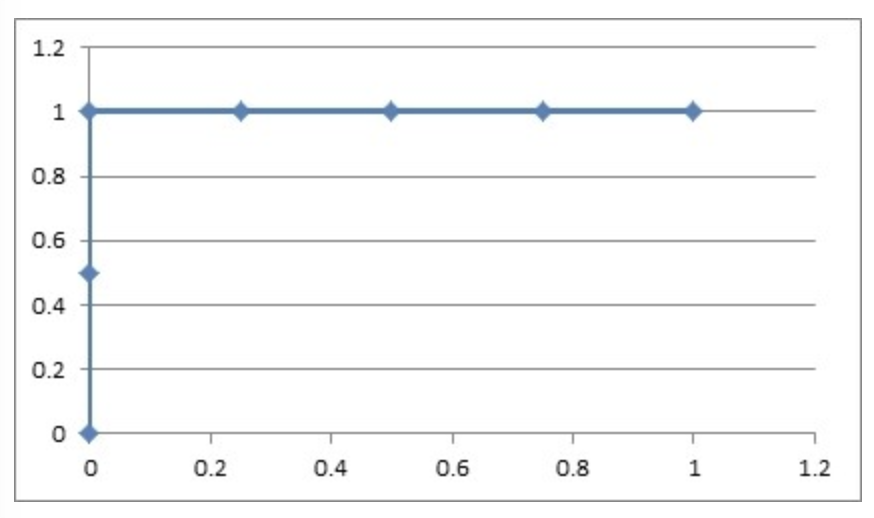

## 如果概率的序列是$(1:0.9,2:0.8,3:0.7,4:0.6,5:0.5,6:0.4)$

与原来的序列一起，得到序列（从概率从高到低排）

| 1        | 1        | 0        | 0        | 0        | 0        |
| -------- | -------- | -------- | -------- | -------- | -------- |
| 0.9      | 0.8      | 0.7      | 0.6      | 0.5      | 0.4      |

绘制的步骤是：

1. 把概率序列从高到低排序，得到顺序（1:0.9,2:0.8,3:0.7,4:0.6,5:0.5,6:0.4）；
2. 从概率最大开始取一个点作为正类，取到点1，计算得到TPR=0.5，FPR=0.0；
3. 从概率最大开始，再取一个点作为正类，取到点2，计算得到TPR=0.5，FPR=0.25；
4. 再从最大开始取一个点作为正类，取到点3，计算得到TPR=1.0，FPR=0.25;
5. 以此类推，得到6对TPR和FPR。

然后把这6对数据组成6个点(0,0.5),(0.25,0.5),(0.25,1),(0.5,1),(0.75,1),(1.0,1.0)。

这6个点在二维坐标系中能绘出来。

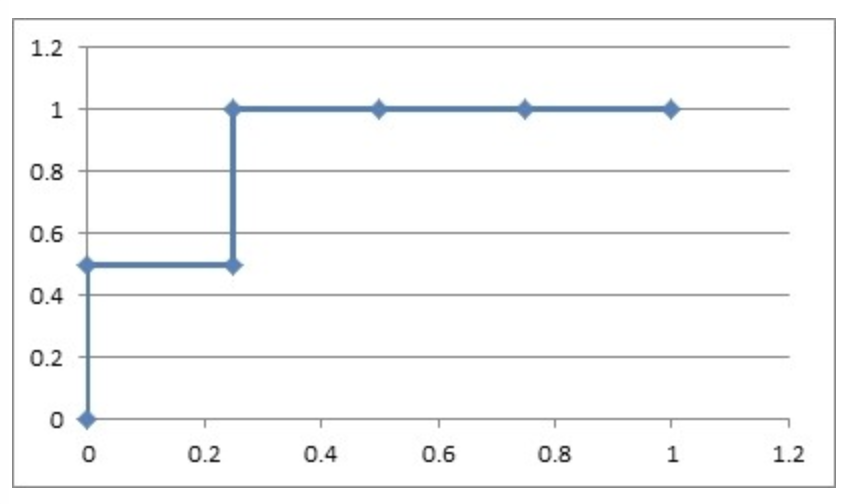

## 如果概率的序列是$(1:0.4,2:0.6,3:0.5,4:0.7,5:0.8,6:0.9)$

与原来的序列一起，得到序列（从概率从高到低排）

| 1        | 1        | 0        | 0        | 0        | 0        |
| -------- | -------- | -------- | -------- | -------- | -------- |
| 0.9      | 0.8      | 0.7      | 0.6      | 0.5      | 0.4      |

绘制的步骤是：

1. 把概率序列从高到低排序，得到顺序$(6:0.9,5:0.8,4:0.7,2:0.6,3:0.5,1:0.4)$；
2. 从概率最大开始取一个点作为正类，取到点6，计算得到TPR=0.0，FPR=0.25；
3. 从概率最大开始，再取一个点作为正类，取到点5，计算得到TPR=0.0，FPR=0.5；
4. 再从最大开始取一个点作为正类，取到点4，计算得到TPR=0.0，FPR=0.75;
5. 以此类推，得到6对TPR和FPR。

然后把这6对数据组成6个点(0.25,0.0),(0.5,0.0),(0.75,0.0),(1.0,0.0),(1.0,0.5),(1.0,1.0)。

这6个点在二维坐标系中能绘出来。

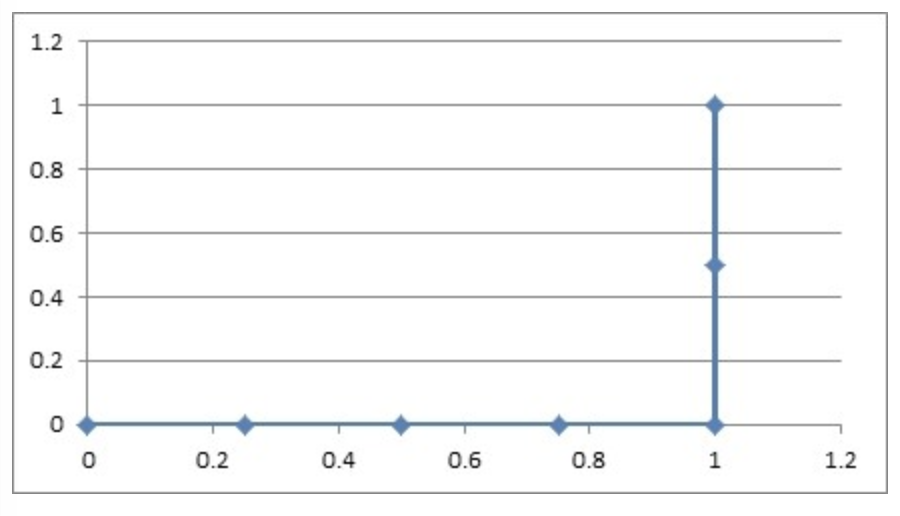

## 意义解释
如上图的例子，总共6个点，2个正样本，4个负样本，取一个正样本和一个负样本的情况总共有8种。

上面的第一种情况，从上往下取，无论怎么取，正样本的概率总在负样本之上，所以分对的概率为1，AUC=1。再看那个ROC曲线，它的积分是什么？也是1，ROC曲线的积分与AUC相等。

上面第二种情况，如果取到了样本2和3，那就分错了，其他情况都分对了；所以分对的概率是0.875，AUC=0.875。再看那个ROC曲线，它的积分也是0.875，ROC曲线的积分与AUC相等。

上面的第三种情况，无论怎么取，都是分错的，所以分对的概率是0，AUC=0.0。再看ROC曲线，它的积分也是0.0，ROC曲线的积分与AUC相等。

很牛吧，其实AUC的意思是——Area Under roc Curve，就是ROC曲线的积分，也是ROC曲线下面的面积。

绘制ROC曲线的意义很明显，不断地把可能分错的情况扣除掉，从概率最高往下取的点，每有一个是负样本，就会导致分错排在它下面的所有正样本，所以要把它下面的正样本数扣除掉（1-TPR，剩下的正样本的比例）。总的ROC曲线绘制出来了，AUC就定了，分对的概率也能求出来了。


## 小结
1. 构建模型，把模型的概率值从大到小进行排序
2. 从概率最大的点开始取值，一直进行tpr和fpr的计算，然后构建整体模型，得到结果
3. 其实就是在求解积分（面积）